### EDA of Surface Water - Bhopal


Data was taken from Google Earth Engine Global Surface Water Dataset [JRC Global Surface Water Mapping Layers, v1.4.](https://developers.google.com/earth-engine/datasets/catalog/JRC_GSW1_4_GlobalSurfaceWater)

[Javascript](https://github.com/EmanuelAfessa/omdena_water_scarcity/blob/main/notebooks/data_fetching/Bhopal_Water_Surface_Area_by_Month.txt) for fetching data.



The surface water area (square meters) is the sum of all areas in the region of interest (AOI) as a circular buffer of 20 kilometers around a single central point in Bhopal (77.4126, 23.2599)

The monthly date range is from January 2000 to December 2020.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import module
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data
df = pd.read_csv('Bhopal_Water_Area_by_Month_2000_2020.csv')

In [4]:
# Look at first few rows
df.head()

,system:index,month,sumWater,.geo
0,2000_01,Jan-00,0.000,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,2000_02,Feb-00,1536590.984,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2000_03,Mar-00,1533667.451,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,2000_04,Apr-00,1524755.725,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,2000_05,May-00,1522755.725,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [5]:
# Look at data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  252 non-null    object 
 1   month         252 non-null    object 
 2   sumWater      252 non-null    float64
 3   .geo          252 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.0+ KB


In [6]:
# Improt module
import datetime as dt

# Define the conversion function for 'MMM-YY' format
def convert_to_datetime(month_str):
    return dt.datetime.strptime(month_str, '%b-%y')

# Apply the conversion directly to the 'month' column
df['month'] = df['month'].apply(convert_to_datetime)

# Check the first few rows to verify the conversion
print(df.head())

  system:index      month     sumWater                                    .geo
0      2000_01 2000-01-01        0.000  {"type":"MultiPoint","coordinates":[]}
1      2000_02 2000-02-01  1536590.984  {"type":"MultiPoint","coordinates":[]}
2      2000_03 2000-03-01  1533667.451  {"type":"MultiPoint","coordinates":[]}
3      2000_04 2000-04-01  1524755.725  {"type":"MultiPoint","coordinates":[]}
4      2000_05 2000-05-01  1522755.725  {"type":"MultiPoint","coordinates":[]}


In [7]:
# Make sure 'month' is datetime64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   system:index  252 non-null    object        
 1   month         252 non-null    datetime64[ns]
 2   sumWater      252 non-null    float64       
 3   .geo          252 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 8.0+ KB


In [8]:
# Look at column names>
df.columns

Index(['system:index', 'month', 'sumWater', '.geo'], dtype='object')

In [9]:
# Look for nan 
df.isna().sum()

system:index    0
month           0
sumWater        0
.geo            0
dtype: int64

In [10]:
# Look at statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sumWater,252.0,1.134311e+06,578338.476617,0.0,770293.784275,1498639.202,1.532946e+06,1559647.392


In [11]:
# Get rid of useless columns
df = df.drop(['system:index', '.geo'], axis=1)

In [12]:
# Check
df.head()

,month,sumWater
0,2000-01-01,0.000
1,2000-02-01,1536590.984
2,2000-03-01,1533667.451
3,2000-04-01,1524755.725
4,2000-05-01,1522755.725


In [13]:
# Check for outliers

# Calculating Q1, Q3, and IQR
Q1 = df['sumWater'].quantile(0.25)
Q3 = df['sumWater'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['sumWater'] < lower_bound) | (df['sumWater'] > upper_bound)]

if not outliers.empty:
    print(outliers)
else:
    print('No outliers detected')

No outliers detected


In [14]:
# # Plot the trend of sumWater over time
# plt.figure(figsize=(15, 6))
# plt.plot(df['month'], df['sumWater'], marker='o', linestyle='-', color='b')
# plt.title('Trend of Water Area Over Time')
# plt.xlabel('Year')
# plt.ylabel('Sum of Water Area')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

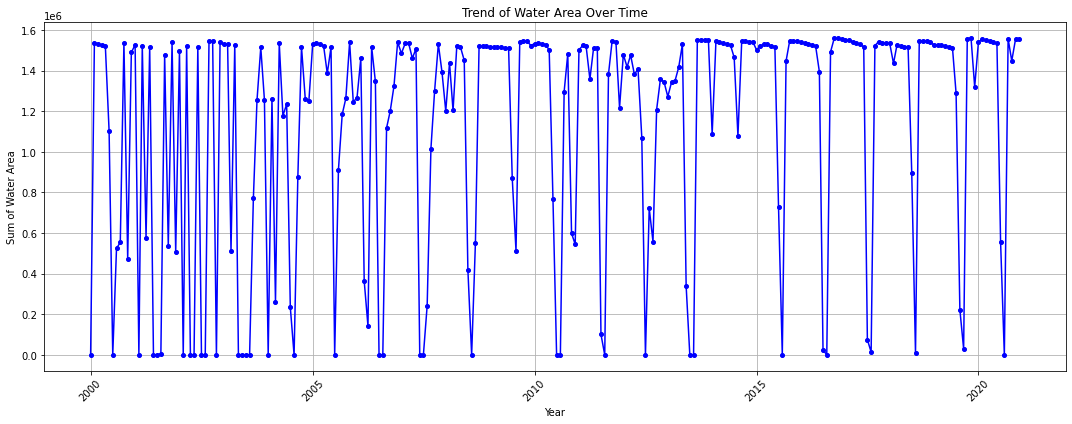

In [15]:
# Import module
import matplotlib.dates as mdates

# Plot the trend of sumWater over time
plt.figure(figsize=(15, 6))
plt.plot(df['month'], df['sumWater'], marker='o', linestyle='-', color='b', markersize=4)
plt.title('Trend of Water Area Over Time')
plt.xlabel('Year')
plt.ylabel('Sum of Water Area')
plt.grid(True)

# Set major ticks to every 5 years and format them to show only the year & show every 5 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  
# Format to show year only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Seasonality** -- The plot exhibits a strong seasonal pattern, as evidenced by the regular peaks and troughs that occur each year. This indicates that the water area experiences significant seasonal changes, which could be related to various factors such as precipitation patterns, agricultural cycles, or other environmental factors.

**Annual Peaks and Troughs** -- Every year, there are points where the water area reaches its maximum and minimum. These are likely related to seasonal weather changes, with peaks possibly occurring during wet seasons and troughs during dry seasons.

**Consistency Over Years** -- The amplitude of the seasonal cycles appears relatively consistent over the decades, which suggests that the underlying seasonal phenomena have remained stable over time.

**Outliers** -- From a visual standpoint, the graph does not display any data points that significantly deviate from the overall pattern, supporting the analytical observation that outliers are not present within the data as assessed in the above analysis.

**Overall Trend** -- Despite the strong seasonality, there doesn't appear to be a clear long-term trend in either direction (increase or decrease). The mean level around which the seasonal fluctuations occur seems to be relatively constant over the years.

**Overall Data Quality** -- There are no obvious gaps or missing data, as each year appears to have a full cycle of peaks and troughs.

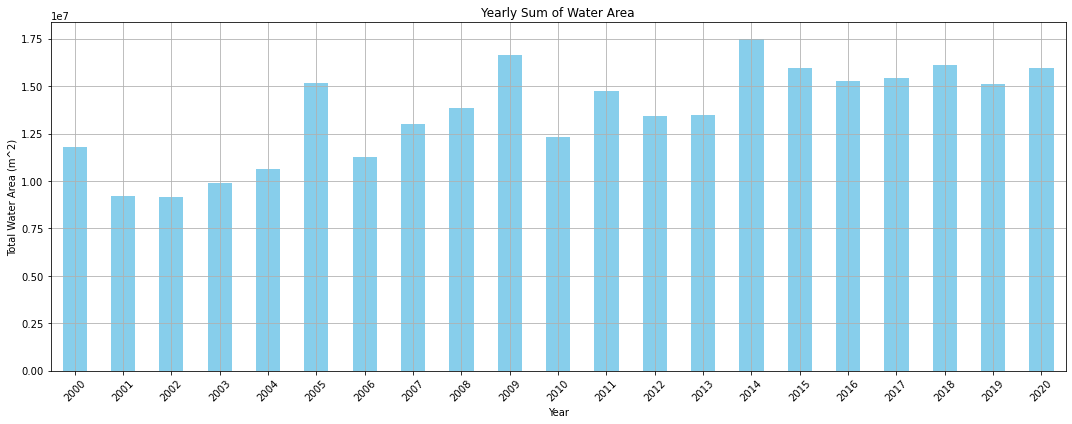

In [16]:
# Extract year from the month column
df['year'] = df['month'].dt.year

# Aggregate data by year
yearly_data = df.groupby('year')['sumWater'].sum()

# Plot yearly data
plt.figure(figsize=(15, 6))
yearly_data.plot(kind='bar', color='skyblue')
plt.title('Yearly Sum of Water Area')
plt.xlabel('Year')
plt.ylabel('Total Water Area (m^2)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


**Variability** -- There is variability in the total water area from year to year. This could be indicative of varying annual rainfall patterns, changes in land usage, or other environmental factors that influence water accumulation.

**General Increase** -- There seems to be a general increase in the total water area from 2001 to around 2005. This period shows a trend where each successive year has a higher total water area than the previous one.

**Fluctuating Period** -- From around 2006 to 2015, there's a period of fluctuation where the total water area does not follow a clear trend. Some years see an increase, while others see a decrease when compared to the previous year.

**Stabilization** -- Post-2015, the total water area appears to stabilize somewhat, with less dramatic year-to-year changes. The bars for these years are of similar height, suggesting that the factors affecting the water area have remained relatively constant during these years. Perhaps this may indicate a change from seasonal variabilty to less predictable situations.

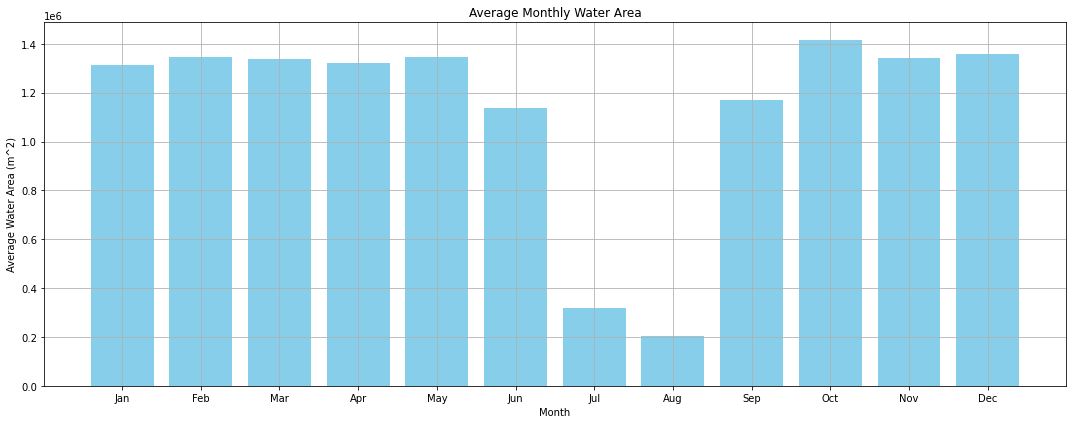

In [17]:
# Extract month (as a number) from the date
df['month_number'] = df['month'].dt.month

# Aggregate data by month (across all years)
monthly_avg_data = df.groupby('month_number')['sumWater'].mean()

# Month labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the monthly average data
plt.figure(figsize=(15, 6))
plt.bar(months, monthly_avg_data, color='skyblue')
plt.title('Average Monthly Water Area')
plt.xlabel('Month')
plt.ylabel('Average Water Area (m^2)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


**Seasonal Variations** -- The plot shows seasonal variations in water area. Some months, such as January, April, and October through December, tend to have higher average water areas, while other months, especially June through August, show significantly lower averages.

**Summer Decrease** -- The lowest average water area occurs in July and August, possibly from following the summer period in Bhopal. This could be related to higher evaporation rates, increased water usage, or lower precipitation during these months.

**Winter Increase** -- The highest values occur in the colder months, suggesting that there is less water loss due to evaporation and possibly higher precipitation rates, or it could be due to the accumulation of water from melting snow, depending on the region's inflow.

**Spring and Autumn Fluctuations** -- The months of February, March, May, September, and November exhibit mid-range values that may reflect transitional weather patterns during spring and autumn.

In [18]:
# Create a new DataFrame with 'month' set as index
new_df = df.set_index('month').copy()

# Set frequency for the new DataFrame's DateTimeIndex
new_df = new_df.asfreq('MS')  # 'MS' --> 'Month Start'

# Check if the new DataFrame looks correct
print(new_df.head())

               sumWater  year  month_number
month                                      
2000-01-01        0.000  2000             1
2000-02-01  1536590.984  2000             2
2000-03-01  1533667.451  2000             3
2000-04-01  1524755.725  2000             4
2000-05-01  1522755.725  2000             5


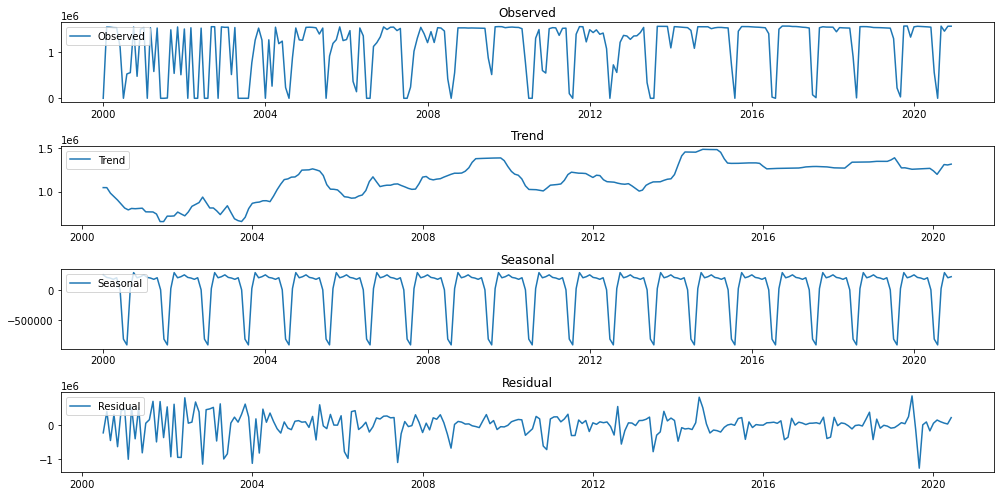

In [19]:
# Import module
import statsmodels.api as sm

# Seasonal decomposition on the new DataFrame
decomposition = sm.tsa.seasonal_decompose(new_df['sumWater'], model='additive')

# Plot the decomposition
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


The **Observed** plot shows significant fluctuations that repeat at regular intervals, indicating a strong seasonal pattern. The amplitude of the seasonal swings appears to be fairly consistent over time, which seems to suggest that the seasonal effect does not change much from year to year.

The **Trend** plot shows a gradual upward movement from 2000 to around 2010, indicating that the water area increased during this period. After 2010, the trend appears to be relatively flat, with a slight increase towards the end of the series. This suggests that any long-term increase in water area stabilized after 2010.

The **Seasonal** plot reveals a very clear and consistent seasonal pattern. The cycle appears to repeat annually, with sharp drops and recoveries suggesting a strong seasonal influence—perhaps related to wet and dry seasons, or other seasonal climate patterns.

The **Residual** plot is the noise left over after the seasonal and trend components have been accounted for. The residuals in this time series seem to be quite random with no apparent pattern, which is typical for the residual component. There are, however, some spikes and larger fluctuations, which could be due to irregular events or other non-seasonal factors affecting the water area.

https://otexts.com/fpp3/decomposition.html

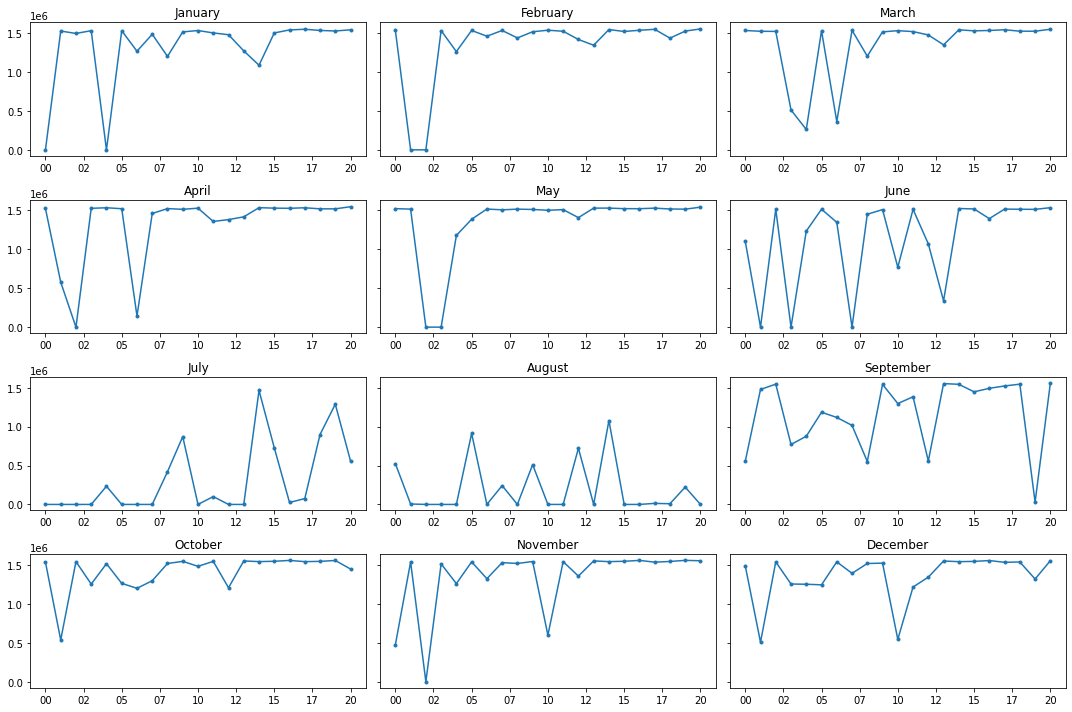

In [20]:
# Import module
import matplotlib.ticker as mticker


# Create 'month_name' from 'month'
df['month_name'] = df['month'].dt.strftime('%B')

# Create the pivot table
pivot_data_yoy = df.pivot_table(values='sumWater', index='month_name', columns='year', aggfunc='mean')

# Months sorted in calendar order
months_calendar_order = ['January', 'February', 'March', 'April', 'May', 'June',
                         'July', 'August', 'September', 'October', 'November', 'December']
pivot_data_yoy = pivot_data_yoy.reindex(months_calendar_order)

# Define a formatter function for x-axis ticks
def format_year(tick_val, pos):
    if int(tick_val) in pivot_data_yoy.columns:
        return "{:02d}".format(int(tick_val) % 100)
    else:
        return ""

# Plot the year-over-year data for each month
fig, axes = plt.subplots(4, 3, figsize=(15, 10), sharey=True)

# Iterate over each month and create a subplot
for i, month in enumerate(months_calendar_order):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.plot(pivot_data_yoy.columns, pivot_data_yoy.loc[month], marker='o', markersize=3)
    ax.set_title(month)
    
    # Set custom x-axis tick formatter
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_year))

plt.tight_layout()
plt.show()


**Seasonal Patterns** -- Most months display clear patterns that seem to repeat annually, which indicates strong seasonal effects. This is consistent with the seasonal decomposition analysis sbove.

**Trends** -- Some months, like January, show a more stable trend across years, while others, like August and November, show significant variations from year to year. This could be due to environmental factors affecting water levels differently during these months.

**Anomalies** -- There are noticeable spikes and dips in certain years for almost every month. For instance, July shows significant variability with sharp increases and decreases in the water area. These could be due to specific events or anomalies such as heavy rainfall, drought conditions, or human interventions affecting water levels.

**Comparing Months** -- When comparing across the months, some months like May and June show dramatic fluctuations in certain years, suggesting that during these months, the water area is subject to more significant changes.

**Stability** -- Months like January and December show a relatively stable water area, with only minor fluctuations compared to other months.

**Data Gaps** -- Lines that drop to zero indicate zero values for certain years.

January: Shows a stable pattern with a slight increase over the years.

February: Exhibits some variability but generally stable, with a significant drop around 2005.

March: Relatively stable with slight variability.

April through June: These graphs show some of the most significant drops in water area, which could indicate seasonal lows.

July through August: These months show a lot of variability, probably related to seasonal weather patterns like dry seasons.

September through December: Generally more stable, with October showing a gradual increase over time.